In [135]:
!pip install ucimlrepo

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

## Task 1: Acquire, preprocess, and and analyze the data

### 1. Load datasets into Pandas objects

In [137]:
parkinsons = fetch_ucirepo(id=174)
# binary

# data (as pandas dataframes)
X_parkinsons = parkinsons.data.features
y_parkinsons = parkinsons.data.targets

In [138]:
X_parkinsons

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [139]:
y_parkinsons

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [140]:
wine = fetch_ucirepo(id=109)
# multiclass

# data (as pandas dataframes)
X_wine = wine.data.features
y_wine = wine.data.targets

In [141]:
X_wine

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [142]:
y_wine

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


### 2. Use simple regression as a measure of feature importance

First we standardize both datasets to convert the response columns to continuous, as well as make sure all our columns are on equal footing

In [143]:
parkinsons_combined = pd.concat([X_parkinsons, y_parkinsons], axis=1)
# joining the two datasets to standardize them together

In [144]:
parkinsons_combined

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [145]:
parkinsons_combined = parkinsons_combined.dropna()
# removing any null values just in case

In [146]:
parkinsons_combined

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [147]:
stdzer_parkinsons = StandardScaler()
stdzer_parkinsons.fit(parkinsons_combined)
stdzer_parkinsons.mean_
# display our means to get a sense of our data

array([ 1.54228641e+02,  1.97104918e+02,  1.16324631e+02,  6.22046154e-03,
        6.22046154e-03,  3.30641026e-03,  3.44635897e-03,  9.91994872e-03,
        2.97091282e-02,  2.97091282e-02,  1.56641538e-02,  1.78782564e-02,
        2.40814872e-02,  4.69926154e-02,  2.48470769e-02,  2.18859744e+01,
        4.98535538e-01,  7.18099046e-01, -5.68439674e+00,  2.26510349e-01,
        2.38182609e+00,  2.06551641e-01,  7.53846154e-01])

In [148]:
parkinsons_standardized = stdzer_parkinsons.transform(parkinsons_combined)

In [149]:
parkinsons_standardized = pd.DataFrame(parkinsons_standardized)
parkinsons_standardized

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.829300,-0.436165,-0.952037,0.334914,0.334914,0.132963,0.760800,0.131755,0.745985,0.745985,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,0.571429
1,-0.770972,-0.530974,-0.057721,0.715418,0.715418,0.453892,1.276809,0.452684,1.681731,1.681731,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,0.571429
2,-0.909476,-0.723168,-0.109875,0.884991,0.884991,0.720770,1.585687,0.721813,1.202693,1.202693,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,0.571429
3,-0.909622,-0.649092,-0.114229,0.775389,0.775389,0.578885,1.284076,0.577677,1.340396,1.340396,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,0.571429
4,-0.925657,-0.606245,-0.130608,1.368893,1.368893,1.095750,2.047187,1.096793,1.836448,1.836448,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.337173,-0.228505,-0.311189,-0.227459,0.593395,0.593395,...,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703,-1.750000
191,1.339202,0.612690,-0.618218,-0.120037,-0.120037,0.001213,-0.191272,0.002258,-0.116922,-0.116922,...,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929,-1.750000
192,0.495578,0.470104,-0.968393,1.526058,1.526058,0.991026,0.797139,0.992069,-0.352453,-0.352453,...,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410,-1.750000
193,1.078761,2.190044,-0.954180,0.243924,0.243924,0.132963,0.164847,0.131755,-0.358834,-0.358834,...,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105,-1.750000


In [150]:
parkinsons_ft_names = [*parkinsons_combined]
# give the columns their original names
parkinsons_rename_dct = {i: ft for i, ft in enumerate(parkinsons_ft_names)}
parkinsons_rename_dct

{0: 'MDVP:Fo',
 1: 'MDVP:Fhi',
 2: 'MDVP:Flo',
 3: 'MDVP:Jitter',
 4: 'MDVP:Jitter',
 5: 'MDVP:RAP',
 6: 'MDVP:PPQ',
 7: 'Jitter:DDP',
 8: 'MDVP:Shimmer',
 9: 'MDVP:Shimmer',
 10: 'Shimmer:APQ3',
 11: 'Shimmer:APQ5',
 12: 'MDVP:APQ',
 13: 'Shimmer:DDA',
 14: 'NHR',
 15: 'HNR',
 16: 'RPDE',
 17: 'DFA',
 18: 'spread1',
 19: 'spread2',
 20: 'D2',
 21: 'PPE',
 22: 'status'}

In [151]:
parkinsons_standardized = parkinsons_standardized.rename(mapper=parkinsons_rename_dct, axis=1)

In [152]:
parkinsons_standardized

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.334914,0.132963,0.760800,0.131755,0.745985,0.745985,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,0.571429
1,-0.770972,-0.530974,-0.057721,0.715418,0.715418,0.453892,1.276809,0.452684,1.681731,1.681731,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,0.571429
2,-0.909476,-0.723168,-0.109875,0.884991,0.884991,0.720770,1.585687,0.721813,1.202693,1.202693,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,0.571429
3,-0.909622,-0.649092,-0.114229,0.775389,0.775389,0.578885,1.284076,0.577677,1.340396,1.340396,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,0.571429
4,-0.925657,-0.606245,-0.130608,1.368893,1.368893,1.095750,2.047187,1.096793,1.836448,1.836448,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.337173,-0.228505,-0.311189,-0.227459,0.593395,0.593395,...,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703,-1.750000
191,1.339202,0.612690,-0.618218,-0.120037,-0.120037,0.001213,-0.191272,0.002258,-0.116922,-0.116922,...,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929,-1.750000
192,0.495578,0.470104,-0.968393,1.526058,1.526058,0.991026,0.797139,0.992069,-0.352453,-0.352453,...,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410,-1.750000
193,1.078761,2.190044,-0.954180,0.243924,0.243924,0.132963,0.164847,0.131755,-0.358834,-0.358834,...,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105,-1.750000


In [153]:
parkinsons_features = parkinsons_standardized.loc[:,parkinsons_standardized.columns != 'status']
parkinsons_labels = parkinsons_standardized['status']
feature_corr_parkinsons = parkinsons_features.T @ parkinsons_labels

In [154]:
feature_corr_parkinsons = feature_corr_parkinsons/len(parkinsons_standardized)
# now divide by N, the number of samples

In [155]:
feature_corr_parkinsons

,0
MDVP:Fo,-0.383535
MDVP:Fhi,-0.166136
MDVP:Flo,-0.380200
MDVP:Jitter,0.278220
MDVP:Jitter,0.278220
MDVP:RAP,0.266668
MDVP:PPQ,0.288698
Jitter:DDP,0.266646
MDVP:Shimmer,0.367430
MDVP:Shimmer,0.367430


In [156]:
# sort features by their correlation to the response variable
sorted_features_parkinsons = feature_corr_parkinsons.sort_values(ascending=True)
sorted_features_parkinsons

,0
MDVP:Fo,-0.383535
MDVP:Flo,-0.380200
HNR,-0.361515
MDVP:Fhi,-0.166136
NHR,0.189429
DFA,0.231739
Jitter:DDP,0.266646
MDVP:RAP,0.266668
MDVP:Jitter,0.278220
MDVP:Jitter,0.278220


In [157]:
wine_combined = pd.concat([X_wine, y_wine], axis=1)

In [158]:
wine_combined

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [159]:
wine_combined = wine_combined.dropna()

In [160]:
wine_combined

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [161]:
# now one-hot encode the multiclass label column in order to compute regression coefficients
wine_classes = pd.get_dummies(data=wine_combined['class'], dtype=int)
wine_classes

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [162]:
wine_classes = wine_classes.rename(mapper={1: 'class 1', 2: 'class 2', 3: 'class 3'}, axis=1)
wine_classes

,class 1,class 2,class 3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [163]:
wine_combined = wine_combined.drop(labels=['class'], axis=1)
wine_combined

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [164]:
# now combined one-hot encoded columns with original dataset to get C binary columns corresponding to the response variables
wine_combined = pd.concat(objs=[wine_combined, wine_classes], axis=1)
wine_combined

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class 1,class 2,class 3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,1


In [165]:
# now standardize the wine dataset
wine_stdzer = StandardScaler()
wine_stdzer.fit(wine_combined)
wine_stdzer.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02, 3.31460674e-01, 3.98876404e-01, 2.69662921e-01])

In [166]:
# now transform the wine dataset
wine_standardized = wine_stdzer.transform(wine_combined)

In [167]:
wine_standardized = pd.DataFrame(wine_standardized)
wine_standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.420193,-0.814587,-0.607644
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.420193,-0.814587,-0.607644
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.420193,-0.814587,-0.607644
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.420193,-0.814587,-0.607644
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.420193,-0.814587,-0.607644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,-0.704129,-0.814587,1.645701
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,-0.704129,-0.814587,1.645701
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,-0.704129,-0.814587,1.645701
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,-0.704129,-0.814587,1.645701


In [168]:
wine_ft_names = [*wine_combined]
# give the columns their original names
wine_rename_dct = {i: ft for i, ft in enumerate(wine_ft_names)}
wine_rename_dct

{0: 'Alcohol',
 1: 'Malicacid',
 2: 'Ash',
 3: 'Alcalinity_of_ash',
 4: 'Magnesium',
 5: 'Total_phenols',
 6: 'Flavanoids',
 7: 'Nonflavanoid_phenols',
 8: 'Proanthocyanins',
 9: 'Color_intensity',
 10: 'Hue',
 11: '0D280_0D315_of_diluted_wines',
 12: 'Proline',
 13: 'class 1',
 14: 'class 2',
 15: 'class 3'}

In [169]:
wine_standardized = wine_standardized.rename(mapper=wine_rename_dct, axis=1)

In [170]:
wine_standardized

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class 1,class 2,class 3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.420193,-0.814587,-0.607644
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.420193,-0.814587,-0.607644
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.420193,-0.814587,-0.607644
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.420193,-0.814587,-0.607644
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.420193,-0.814587,-0.607644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,-0.704129,-0.814587,1.645701
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,-0.704129,-0.814587,1.645701
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,-0.704129,-0.814587,1.645701
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,-0.704129,-0.814587,1.645701


In [171]:
wine_features = wine_standardized.loc[:,'Alcohol':'Proline']
wine_labels = wine_standardized.loc[:,'class 1':'class 3']
feature_corr_wine = wine_features.T @ wine_labels

In [172]:
feature_corr_wine = feature_corr_wine/len(wine_combined)

In [173]:
feature_corr_wine

,class 1,class 2,class 3
Alcohol,0.647232,-0.726383,0.114941
Malicacid,-0.205847,-0.295175,0.544042
Ash,0.229268,-0.362457,0.156738
Alcalinity_of_ash,-0.519646,0.181764,0.350650
Magnesium,0.326171,-0.296972,-0.018306
Total_phenols,0.614960,-0.047301,-0.600119
Flavanoids,0.673770,0.042179,-0.761232
Nonflavanoid_phenols,-0.407680,0.011868,0.419347
Proanthocyanins,0.380500,0.056208,-0.465629
Color_intensity,0.143221,-0.694679,0.614582


In [174]:
wine_class1_corr = feature_corr_wine['class 1']
wine_class2_corr = feature_corr_wine['class 2']
wine_class3_corr = feature_corr_wine['class 3']

In [175]:
sorted_wine_class1_corr = wine_class1_corr.sort_values(ascending=True)
sorted_wine_class1_corr

,class 1
Alcalinity_of_ash,-0.519646
Nonflavanoid_phenols,-0.407680
Malicacid,-0.205847
Color_intensity,0.143221
Ash,0.229268
Hue,0.323088
Magnesium,0.326171
Proanthocyanins,0.380500
0D280_0D315_of_diluted_wines,0.543131
Total_phenols,0.614960


In [176]:
sorted_wine_class2_corr = wine_class2_corr.sort_values(ascending=True)
sorted_wine_class2_corr

,class 2
Alcohol,-0.726383
Color_intensity,-0.694679
Proline,-0.589850
Ash,-0.362457
Magnesium,-0.296972
Malicacid,-0.295175
Total_phenols,-0.047301
Nonflavanoid_phenols,0.011868
Flavanoids,0.042179
Proanthocyanins,0.056208


In [177]:
sorted_wine_class3_corr = wine_class3_corr.sort_values(ascending=True)
sorted_wine_class3_corr

,class 3
0D280_0D315_of_diluted_wines,-0.796590
Flavanoids,-0.761232
Hue,-0.732443
Total_phenols,-0.600119
Proanthocyanins,-0.465629
Proline,-0.226394
Magnesium,-0.018306
Alcohol,0.114941
Ash,0.156738
Alcalinity_of_ash,0.350650


### 3. Generate horizontal barplots

Text(0, 0.5, 'Feature')

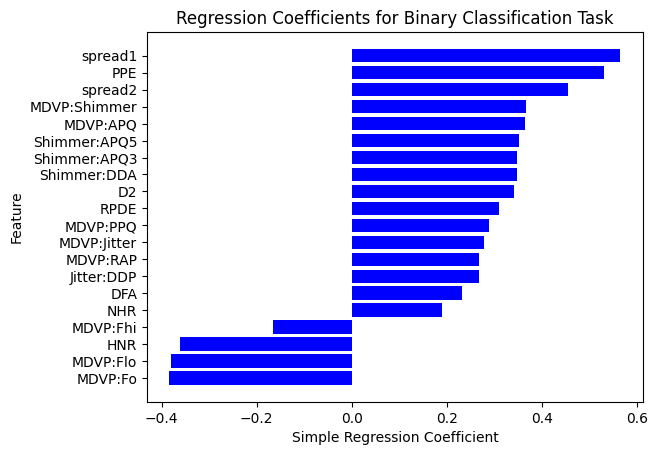

In [178]:
plt.barh(sorted_features_parkinsons.index, sorted_features_parkinsons, color='b')
plt.title('Regression Coefficients for Binary Classification Task')
plt.xlabel('Simple Regression Coefficient')
plt.ylabel('Feature')
# barplot for binary classification

Text(0.5, 0, 'Simple Regression Coefficient')

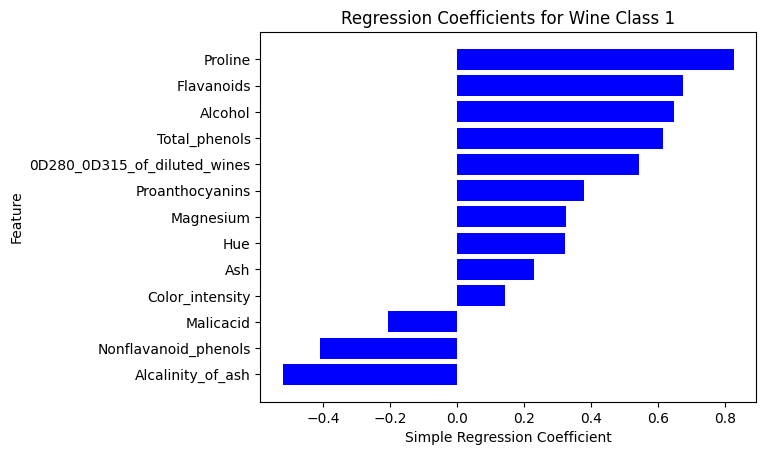

In [179]:
# now generate 3 more barplots, one for each class of multiclass classification
plt.clf()
plt.barh(sorted_wine_class1_corr.index, sorted_wine_class1_corr, color='b')
plt.title('Regression Coefficients for Wine Class 1')
plt.ylabel('Feature')
plt.xlabel('Simple Regression Coefficient')

Text(0.5, 0, 'Simple Regression Coefficient')

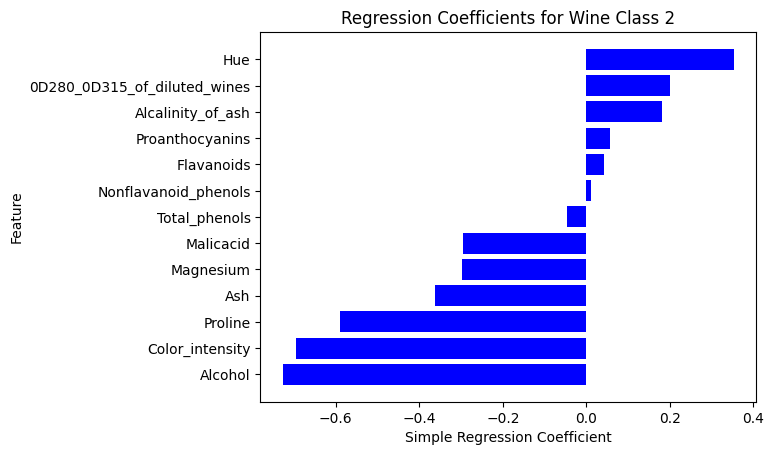

In [180]:
plt.clf()
plt.barh(sorted_wine_class2_corr.index, sorted_wine_class2_corr, color='b')
plt.title('Regression Coefficients for Wine Class 2')
plt.ylabel('Feature')
plt.xlabel('Simple Regression Coefficient')

Text(0.5, 0, 'Simple Regression Coefficient')

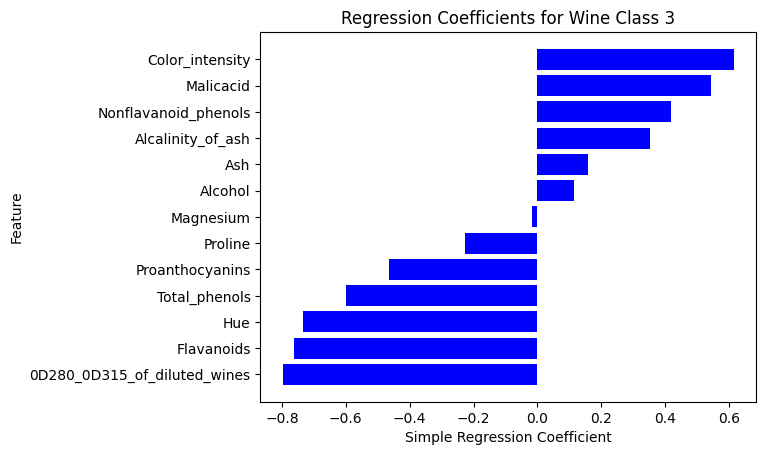

In [181]:
plt.clf()
plt.barh(sorted_wine_class3_corr.index, sorted_wine_class3_corr, color='b')
plt.title('Regression Coefficients for Wine Class 3')
plt.ylabel('Feature')
plt.xlabel('Simple Regression Coefficient')

### 4. A little research into the features and what they indicate

#### Binary classification task

The top three features for the binary classification task are shown to be spread1, PPE, and spread2, respectively. According to the [UCI website on the Parkinson's Disease dataset](https://archive.ics.uci.edu/dataset/174/parkinsons), these three features are all nonlinear measures of fundamental frequency variation, which is believed to be one of the main indicators that a patient has Parkinson's Disease. Meanwhile, MDVP:Fhi, MNR, MDVP:Flo, and MDVP:Fo are the bottom four features, with all four having a negative simple regression coefficient in relation to the response variable.

### 5. Now remove unnecessary/unrelated features

In [182]:
sorted_features_parkinsons_descending = sorted_features_parkinsons.sort_values(ascending=False)
sorted_features_parkinsons_descending
# let's take a look at our parkinson's features again

,0
spread1,0.564838
PPE,0.531039
spread2,0.454842
MDVP:Shimmer,0.367430
MDVP:Shimmer,0.367430
MDVP:APQ,0.364316
Shimmer:APQ5,0.351148
Shimmer:APQ3,0.347617
Shimmer:DDA,0.347608
D2,0.340232


Let's drop all features that are lower than 0.3

In [183]:
sorted_features_parkinsons_descending = sorted_features_parkinsons_descending.to_dict()
sorted_features_parkinsons_descending

{'spread1': 0.5648379969876436,
 'PPE': 0.5310391538731206,
 'spread2': 0.45484212610864266,
 'MDVP:Shimmer': 0.3674298598935416,
 'MDVP:APQ': 0.36431573922311206,
 'Shimmer:APQ5': 0.3511484359380265,
 'Shimmer:APQ3': 0.34761696522403307,
 'Shimmer:DDA': 0.3476083545379774,
 'D2': 0.3402315098803634,
 'RPDE': 0.30856725130270324,
 'MDVP:PPQ': 0.28869834669063854,
 'MDVP:Jitter': 0.2782195982792975,
 'MDVP:RAP': 0.26666755653419655,
 'Jitter:DDP': 0.26664609421158014,
 'DFA': 0.23173927276037884,
 'NHR': 0.18942931888728262,
 'MDVP:Fhi': -0.16613634721043574,
 'HNR': -0.36151486669972255,
 'MDVP:Flo': -0.3802004307012717,
 'MDVP:Fo': -0.3835351511879843}

In [184]:
parkinsons_relevant_features = [
    ft for ft in sorted_features_parkinsons_descending if abs(sorted_features_parkinsons_descending[ft]) >= 0.3802004307012717
]

In [185]:
parkinsons_relevant_features

['spread1', 'PPE', 'spread2', 'MDVP:Flo', 'MDVP:Fo']

In [186]:
parkinsons_labels = parkinsons_standardized['status']
parkinsons_features = parkinsons_standardized[parkinsons_relevant_features]

In [187]:
sorted_wine_class1_corr_rankings = sorted_wine_class1_corr.sort_values(ascending=False)
sorted_wine_class2_corr_rankings = sorted_wine_class2_corr.sort_values(ascending=False)
sorted_wine_class3_corr_rankings = sorted_wine_class3_corr.sort_values(ascending=False)

In [188]:
avg_feat_ranking_wine = {}
for feature in [*wine_standardized]:
    if feature not in ['class 1', 'class 2', 'class 3']:
        ranking1 = sorted_wine_class1_corr_rankings.index.get_loc(feature) + 1
        ranking2 = sorted_wine_class2_corr_rankings.index.get_loc(feature) + 1
        ranking3 = sorted_wine_class3_corr_rankings.index.get_loc(feature) + 1
        avg = (ranking1+ranking2+ranking3)/3
        avg_feat_ranking_wine[feature] = avg
# we find each feature's average ranking over all 3 horizontal barplots

In [189]:
avg_feat_ranking_wine = pd.Series(avg_feat_ranking_wine)
avg_feat_ranking_wine.sort_values(ascending=True)

,0
Flavanoids,6.333333
Proanthocyanins,6.333333
Alcalinity_of_ash,6.666667
Hue,6.666667
0D280_0D315_of_diluted_wines,6.666667
Proline,6.666667
Malicacid,7.000000
Total_phenols,7.000000
Nonflavanoid_phenols,7.000000
Alcohol,7.333333


In [190]:
avg_feat_rankings_wine = avg_feat_ranking_wine.to_dict()
wine_relevant_features = [
    ft for ft in avg_feat_rankings_wine if avg_feat_rankings_wine[ft] <= float(6 + (2/3))
]

In [191]:
wine_relevant_features

['Alcalinity_of_ash',
 'Flavanoids',
 'Proanthocyanins',
 'Hue',
 '0D280_0D315_of_diluted_wines',
 'Proline']

In [192]:
wine_features = wine_standardized[wine_relevant_features]
wine_labels = wine_standardized[['class 1', 'class 2', 'class 3']]

## Task 2: Implement Linear Regression Models

We use $W=(X^TX)^{-1}X^Ty$ and $W=(X^TX)^{-1}X^TY$

In [193]:
class MultipleLinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
    def fit(self, X, y):
        if X.ndim == 1:
            X = X[:, None]                         #add a dimension for the features
        N = X.shape[0]
        if self.add_bias:
            X = np.column_stack([X,np.ones(N)])
#         implement OLS solution
        design_matrix_inv = np.linalg.pinv(X.T @ X)
        xt_mult_y = X.T @ y
#         assign weights to attribute
        self.w = design_matrix_inv @ xt_mult_y
        return self
    def predict(self, x):
#         x is our X_test
        if self.add_bias:
            x = np.column_stack([x,np.ones(x.shape[0])])
        yh = x @ self.w
#         y = XW
        #predict the y values
        return yh

## Task 3: Implement Logistic and Multiclass Logistic

In [194]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

To introduce a stopping criterion into multiclass logistic regression, we can consider stopping once one of the following criteria is satisfied:
- max number of iterations reached
- the different in training loss is less than a given threshold  
The above two ensure optimal convergence, but do not necessarily hold up well against overfitting  
- we might also consider stopping once the validation loss is less than a given threshold as well  
Whereas early stopping due to validation loss increase would ensure the best possible chance against overfitting

Since we are dealing with more than one weight, we will use $CE = \sum\limits_{n=1}

In [195]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad

    def fit(self, x, y):
        self.ce_loss = []
        # use list to avoid "step" areas
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # gradient descent with stopping condition either norm is small enough or we have reached max iterations
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            a = x @ self.w
            loss = np.sum(y * np.log1p(np.exp(-a)) + (1 - y) * np.log1p(np.exp(a)))
            self.ce_loss.append(loss)
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')

        self.ce_loss = np.array(self.ce_loss)  # Convert to NumPy array after the loop

        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

    def plot_ce_loss(self):
        plt.clf()
        plt.title('Cross Entropy Loss as a function of iterations - Binary Logistic Regression')
        plt.xlabel('# of iterations')
        plt.ylabel('Cross Entropy Loss')
        plt.plot(self.ce_loss)
        plt.show()

# LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

In [196]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.random.rand(nFeatures, nClasses)

    def predict(self, X):
        y_pred = np.exp(np.matmul(X, self.W))
        return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y)

    def ce(self, X, y):
        return -np.sum(y * np.log(self.predict(X)))

    # modify it to add stopping criteria (what can you think of?)
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100):
        self.losses_train = []
        losses_valid = np.zeros(niter)
        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)
            loss_train = self.ce(X, y)
            self.losses_train.append(loss_train)
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                print(f"iter {i}: {loss_train:.3f}")
        self.losses_train = np.array(self.losses_train)
        return self.losses_train, losses_valid

    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros((D, C))
                epsilon[i, j] = np.random.rand() * 1e-4

                self.W = self.W + epsilon
                J1 = self.ce(X, y)
                self.W = W

                self.W = self.W - epsilon
                J2 = self.ce(X, y)
                self.W = W

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        # print(diff)
        return diff

    def plot_ce_loss(self):
        plt.clf()
        plt.title('Cross Entropy Loss as a function of iterations - Multiclass Logistic Regression')
        plt.xlabel('# of iterations')
        plt.ylabel('Cross Entropy Loss')
        plt.plot(self.losses_train)
        plt.show()

## Task 4: Run experiments

### 1. Barplot features in order of importance (already done)

### 2. Train/fit models

#### Train multiple linear regression and binary logistic regression on Parkinson's Disease Dataset

In [197]:
lin_reg_parkinsons = MultipleLinearRegression()
lin_reg_parkinsons_weights = lin_reg_parkinsons.fit(parkinsons_features, parkinsons_labels).w
lin_reg_parkinsons_weights

array([ 4.58238267e-01, -9.91010290e-02,  1.60391019e-01, -1.24217717e-01,
       -1.16734320e-01, -5.25442218e-16])

In [198]:
parkinsons_labels_original = parkinsons_combined['status']
# getting original labels that are discrete and not standardized so that the model can produce correct probabilities
log_reg_parkinsons = LogisticRegression(verbose=True, learning_rate=0.05)
log_reg_parkinsons_weights = log_reg_parkinsons.fit(x=np.array(parkinsons_features), y=np.array(parkinsons_labels_original)).w
log_reg_parkinsons_weights

terminated after 6043 iterations, with norm of the gradient equal to 9.996103276140718e-05
the weight found: [ 1.27156049  1.09600027  0.5896752   0.0099889  -0.07170025  2.36741455]


array([ 1.27156049,  1.09600027,  0.5896752 ,  0.0099889 , -0.07170025,
        2.36741455])

#### Train multivariate linear regression and multiclass logistic regression on Wine Recognition Dataset

In [199]:
lin_reg_wine = MultipleLinearRegression()
lin_reg_wine_weights = lin_reg_wine.fit(wine_features, wine_labels).w
lin_reg_wine_weights

,class 1,class 2,class 3
0,-1.383493e-01,2.622696e-02,1.178134e-01
1,2.928799e-01,3.441070e-02,-3.486365e-01
2,-1.157952e-01,1.010700e-01,1.130859e-02
3,-9.661999e-02,4.194342e-01,-3.603110e-01
4,1.946443e-01,1.307501e-01,-3.507344e-01
5,6.215085e-01,-7.686525e-01,1.888666e-01
6,-3.375060e-16,-2.180297e-16,-2.135230e-17


In [200]:
wine_labels_original = wine_combined[['class 1', 'class 2', 'class 3']]
wine_nFeatures = len([*wine_features])
wine_nClasses = len([*wine_labels_original])
multiclass_wine = Multinomial_logistic(nFeatures=wine_nFeatures, nClasses=wine_nClasses)
multiclass_wine_loss_train, multiclass_wine_loss_valid = multiclass_wine.fit(
    X=np.array(wine_features), y=np.array(wine_labels_original), niter=100)

iter 0: 106.628
iter 1: 86.008
iter 2: 74.510
iter 3: 66.858
iter 4: 61.323
iter 5: 57.105
iter 6: 53.770
iter 7: 51.058
iter 8: 48.804
iter 9: 46.897
iter 10: 45.260
iter 11: 43.837
iter 12: 42.587
iter 13: 41.479
iter 14: 40.489
iter 15: 39.599
iter 16: 38.793
iter 17: 38.059
iter 18: 37.388
iter 19: 36.772
iter 20: 36.204
iter 21: 35.678
iter 22: 35.190
iter 23: 34.736
iter 24: 34.312
iter 25: 33.915
iter 26: 33.542
iter 27: 33.192
iter 28: 32.862
iter 29: 32.551
iter 30: 32.256
iter 31: 31.977
iter 32: 31.713
iter 33: 31.462
iter 34: 31.223
iter 35: 30.996
iter 36: 30.779
iter 37: 30.572
iter 38: 30.375
iter 39: 30.186
iter 40: 30.005
iter 41: 29.831
iter 42: 29.665
iter 43: 29.505
iter 44: 29.352
iter 45: 29.204
iter 46: 29.062
iter 47: 28.926
iter 48: 28.794
iter 49: 28.667
iter 50: 28.545
iter 51: 28.427
iter 52: 28.313
iter 53: 28.202
iter 54: 28.096
iter 55: 27.993
iter 56: 27.893
iter 57: 27.796
iter 58: 27.703
iter 59: 27.612
iter 60: 27.524
iter 61: 27.439
iter 62: 27.356
i

In [201]:
multiclass_wine_weights = multiclass_wine.W
multiclass_wine_weights

array([[-0.52115959,  0.35314747,  0.78372515],
       [ 1.60541813,  0.34788928, -0.29799831],
       [ 0.17284025,  1.01957752,  0.45361631],
       [ 0.32788918,  1.99595395, -0.67050815],
       [ 1.38093261,  0.87692248, -0.04911426],
       [ 2.54354437, -2.56949257,  1.35958828]])

### 3.1. Check analytical gradient vs numerical gradient via perturbation

In [202]:
def check_gradient(self, x, y, feature_names):
    diffs = {}
    for pair in zip(self.w, feature_names):
#         need feature name only for printing/storing
        w = pair[0]
        ft = pair[1]
        xd = x[ft]
        w0 = w
        epsilon = np.random.randn(1)[0]*1e-5
#         generate small perturbation factor from a normal distribution
        w_plus = w0 + epsilon
        w_minus = w0 - epsilon
        a1 = xd * w_plus
        a2 = xd * w_minus
        ce1 = np.sum(y * np.log1p(np.exp(-a1)) + (1-y) * np.log1p(np.exp(a1)))
        ce2 = np.sum(y * np.log1p(np.exp(-a2)) + (1-y) * np.log1p(np.exp(a2)))
#         these two lines compute the loss J(w) with the perturbations
        delta_w = (ce1-ce2)/(2*epsilon)
#     numerical gradient
        yhat = 1/(1+np.exp(-xd * w))
        dw_cal = np.sum((yhat - y) * xd) # hand calculated/analytical gradient
        result = (dw_cal - delta_w)**2/(dw_cal + delta_w)**2
        diffs[ft] = result
    return diffs

LogisticRegression.check_gradient = check_gradient

In [203]:
checked_gradients_logreg_parkinsons = log_reg_parkinsons.check_gradient(
    x=parkinsons_features, y=parkinsons_labels, feature_names=[*parkinsons_features])

In [204]:
checked_gradients_logreg_parkinsons

{'spread1': 6.598825729657627e-23,
 'PPE': 3.2865209768462468e-21,
 'spread2': 3.7463766552918374e-23,
 'MDVP:Flo': 4.1952938910766775e-23,
 'MDVP:Fo': 5.1161351976317765e-23}

Since all the values in the dictionary are very small, (than let's say, $10^{-8}$), we can conclude that our implementation of the gradient is correct

In [205]:
multiclass_gradients_checked = multiclass_wine.check_grad(np.array(wine_features), np.array(wine_labels_original))

In [206]:
multiclass_gradients_checked

array([[4.05202978e-17, 1.85467311e-19, 2.02401935e-19],
       [1.27815693e-18, 2.47617490e-20, 1.79959310e-18],
       [3.50018915e-20, 3.27254797e-17, 1.16269788e-17],
       [3.62316355e-20, 4.11122226e-21, 4.60814100e-18],
       [3.34087610e-21, 1.74939733e-23, 7.44302153e-17],
       [6.23883813e-20, 6.50224199e-21, 2.03225093e-20]])

Since all the values in the dictionary are very small, (than let's say, $10^{-8}$), we can conclude that our implementation of the gradient is correct

### 3.2. Plot cross entropy as a function of number of iterations

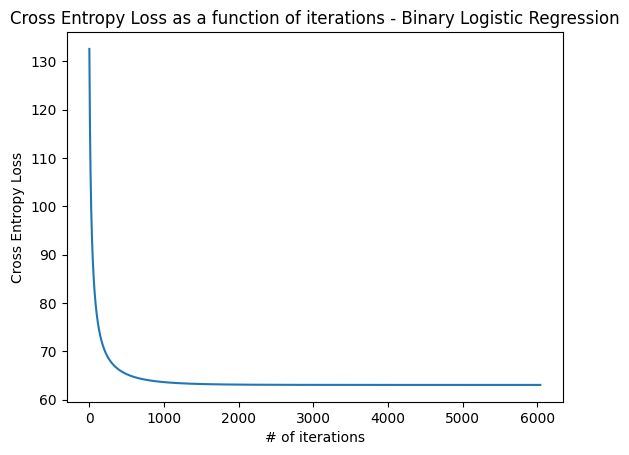

In [207]:
log_reg_parkinsons.plot_ce_loss()

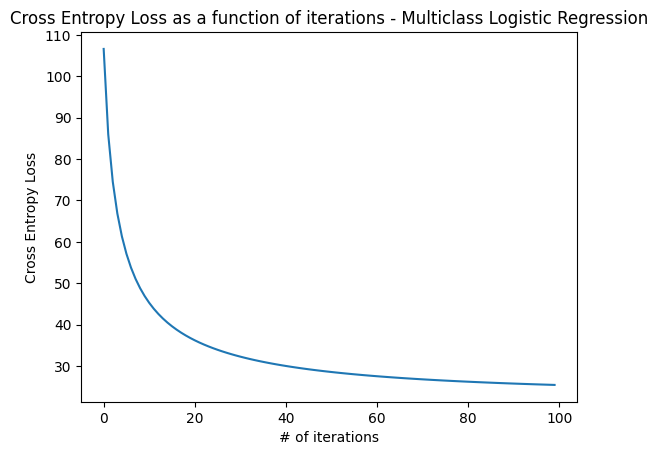

In [208]:
multiclass_wine.plot_ce_loss()

### 4. Split data, and select best model at iteration where AUROC/Validation accuracy is highest

Since AUROC only applies to binary classification since it relies on a 2x2 confusion matrix, we will use AUROC score for the binary classification dataset, and validation accuracy for the multiclass classification dataset

Process:
- split dataset into training, validation, testing  
- train several models (each with different hyperparameters) on training set  
- select best one, and use this to evaluate performance on testing set

For our experiments, we will use 60% training, 20% validation, and 20% testing

In [209]:
def predict_class(self, x):
    return (self.predict(x) >= 0.5).astype(int)
LogisticRegression.predict_class = predict_class

In [210]:
def evaluate_validation_accuracy(predicted, ground_truth):
    return np.mean(predicted == ground_truth)*100

In [211]:
def predict_multiclass(self, x):
    max_indices = np.argmax(x, axis=1)
    one_hot = np.zeros_like(x, dtype=int)
    one_hot[np.arange(x.shape[0]), max_indices] = 1
    return one_hot
Multinomial_logistic.predict_multiclass = predict_multiclass

#### Binary classification task

In [212]:
parkinsons_labels_original = parkinsons_combined['status']
parkinsons_labels_original

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [213]:
parkinsons_features

,spread1,PPE,spread2,MDVP:Flo,MDVP:Fo
0,0.801323,0.868886,0.480477,-0.952037,-0.829300
1,1.479853,1.803605,1.311185,-0.057721,-0.770972
2,1.141445,1.402661,1.017682,-0.109875,-0.909476
3,1.440945,1.806954,1.293840,-0.114229,-0.909622
4,1.780940,2.267082,0.096195,-0.130608,-0.925657
...,...,...,...,...,...
190,-0.785527,-0.817703,-1.256837,-0.508265,0.483467
191,-0.469859,-0.418929,-1.168475,-0.618218,1.339202
192,-1.014154,-0.832410,-0.818079,-0.968393,0.495578
193,-0.974960,-0.926105,-0.229066,-0.954180,1.078761


In [214]:
parkinsons_X_train, parkinsons_X_test, parkinsons_y_train, parkinsons_y_test = train_test_split(
    parkinsons_features, parkinsons_labels_original, test_size=0.2, shuffle=True, random_state=11)

In [215]:
parkinsons_X_train, parkinsons_X_validation, parkinsons_y_train, parkinsons_y_validation = train_test_split(
    parkinsons_X_train, parkinsons_y_train, test_size=0.25, shuffle=True, random_state=11)

In [216]:
# convert the dataframes and series to numpy arrays for use with fit()
parkinsons_X_train = np.array(parkinsons_X_train)
parkinsons_X_validation = np.array(parkinsons_X_validation)
parkinsons_y_train = np.array(parkinsons_y_train)
parkinsons_y_validation = np.array(parkinsons_y_validation)
parkinsons_X_test = np.array(parkinsons_X_test)
parkinsons_y_test = np.array(parkinsons_y_test)

Since we want the validation set to be 20%, and the training set was previously 80%, we allocate a quarter of the training set for validation

For binary logistic regression, the grid search parameters will be:
- epsilon threshold  
- learning rate  
- number of iterations for convergence

In [217]:
learning_rate = [0.1, 0.05, 0.01, 0.005, 0.001]
epsilon = [1e-3, 1e-4, 1e-5, 1e-6]
iterations = [1e2, 1e3, 1e4, 1e5]

In [218]:
best_lr_model = {}
best_validation_acc = float(0)
for lr in learning_rate:
    for eps in epsilon:
        for i in iterations:
            model = LogisticRegression(learning_rate=lr, epsilon=eps, max_iters=i)
            predictions = model.fit(parkinsons_X_train, parkinsons_y_train).predict_class(parkinsons_X_validation)
            acc = evaluate_validation_accuracy(predictions, parkinsons_y_validation)
            print(f'Learning rate: {lr}, epsilon: {eps}, iters: {i} -- Acc: {acc}')
            if acc > best_validation_acc:
                best_validation_acc = acc
                best_lr_model['learning rate'] = lr
                best_lr_model['epsilon'] = eps
                best_lr_model['max iterations'] = i

Learning rate: 0.1, epsilon: 0.001, iters: 100.0 -- Acc: 94.87179487179486
Learning rate: 0.1, epsilon: 0.001, iters: 1000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 0.001, iters: 10000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 0.001, iters: 100000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 0.0001, iters: 100.0 -- Acc: 94.87179487179486
Learning rate: 0.1, epsilon: 0.0001, iters: 1000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 0.0001, iters: 10000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 0.0001, iters: 100000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 1e-05, iters: 100.0 -- Acc: 94.87179487179486
Learning rate: 0.1, epsilon: 1e-05, iters: 1000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 1e-05, iters: 10000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 1e-05, iters: 100000.0 -- Acc: 92.3076923076923
Learning rate: 0.1, epsilon: 1e-06, iters: 100.0 -- Acc: 94.87179487179486
Learning rat

In [219]:
print(best_lr_model, best_validation_acc)

{'learning rate': 0.1, 'epsilon': 0.001, 'max iterations': 100.0} 94.87179487179486


#### Multiclass classification task

In [220]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine_features, wine_labels_original, test_size=0.2, shuffle=True, random_state=11)

In [221]:
wine_X_train, wine_X_validation, wine_y_train, wine_y_validation = train_test_split(
    wine_X_train, wine_y_train, test_size=0.25, shuffle=True, random_state=11)

In [222]:
wine_X_train = np.array(wine_X_train)
wine_X_validation = np.array(wine_X_validation)
wine_y_train = np.array(wine_y_train)
wine_y_validation = np.array(wine_y_validation)
wine_X_test = np.array(wine_X_test)
wine_y_test = np.array(wine_y_test)

In [223]:
learning_rate2 = [0.1, 0.05, 0.01, 0.005, 0.001]
iterations2 = [1e2, 1e3, 1e4, 1e5]

In [224]:
best_mlr_model = {}
best_mlr_acc = float(0)
for lr in learning_rate2:
    for i in iterations2:
        model = Multinomial_logistic(nFeatures=wine_nFeatures, nClasses=wine_nClasses)
        model.fit(X=wine_X_train, y=wine_y_train, lr=lr, niter=int(i))
        predictions = model.predict(wine_X_validation)
        predictions = model.predict_multiclass(
            predictions)
        print(predictions)
        acc = evaluate_validation_accuracy(predictions, wine_y_validation)
        print(f'Learning rate: {lr}, iters: {i} -- Acc: {acc}')
        if acc > best_mlr_acc:
            best_mlr_acc = acc
            best_mlr_model['learning rate'] = lr
            best_mlr_model['max iterations'] = i

Streaming output truncated to the last 5000 lines.
iter 95037: 18.851
iter 95038: 18.851
iter 95039: 18.851
iter 95040: 18.851
iter 95041: 18.851
iter 95042: 18.851
iter 95043: 18.851
iter 95044: 18.851
iter 95045: 18.851
iter 95046: 18.851
iter 95047: 18.851
iter 95048: 18.851
iter 95049: 18.851
iter 95050: 18.851
iter 95051: 18.851
iter 95052: 18.851
iter 95053: 18.851
iter 95054: 18.851
iter 95055: 18.851
iter 95056: 18.851
iter 95057: 18.851
iter 95058: 18.851
iter 95059: 18.851
iter 95060: 18.851
iter 95061: 18.851
iter 95062: 18.851
iter 95063: 18.851
iter 95064: 18.851
iter 95065: 18.851
iter 95066: 18.851
iter 95067: 18.851
iter 95068: 18.851
iter 95069: 18.851
iter 95070: 18.851
iter 95071: 18.851
iter 95072: 18.851
iter 95073: 18.851
iter 95074: 18.851
iter 95075: 18.851
iter 95076: 18.851
iter 95077: 18.851
iter 95078: 18.851
iter 95079: 18.851
iter 95080: 18.851
iter 95081: 18.851
iter 95082: 18.851
iter 95083: 18.851
iter 95084: 18.851
iter 95085: 18.851
iter 95086: 18.851

In [225]:
print(best_mlr_model, best_mlr_acc)

{'learning rate': 0.1, 'max iterations': 10000.0} 98.14814814814815


We have now effectively performed a "grid search" on both our logistic regression models

### 5. Compare linear regression models with logistic regression models in terms of AUROC and prediction accuracy on test set

For linear regression models, you can transform the
predicted continuous values to class probabilities via sigmoid and softmax functions, respectively. For the binary classfication task, we implement AUROC as usual, and for the multiclass classification task, we can take a one vs rest approach, where we treat one class as positive, and the rest as negative

In [226]:
def evaluate_test_accuracy(predictions, labels):
    return np.mean(predictions == labels)*100

In [227]:
best_learning_rate_lr = best_lr_model['learning rate']
best_epsilon_lr = best_lr_model['epsilon']
best_iters_lr = best_lr_model['max iterations']
logreg_model = LogisticRegression(learning_rate=best_learning_rate_lr, epsilon=best_epsilon_lr, max_iters=best_iters_lr)
# predict on binary test set
logreg_predictions = logreg_model.fit(parkinsons_X_train, parkinsons_y_train).predict(parkinsons_X_test)
# class predictions
logreg_class_predictions = logreg_model.predict_class(parkinsons_X_test)
logreg_test_accuracy = evaluate_test_accuracy(logreg_class_predictions, parkinsons_y_test) # accuracy
logreg_test_auc = roc_auc_score(parkinsons_y_test, logreg_predictions)

In [228]:
def predict_class(pred):
    return (pred >= 0.5).astype(int)

In [229]:
linreg_model = MultipleLinearRegression()
linreg_predictions = linreg_model.fit(parkinsons_X_train, parkinsons_y_train).predict(parkinsons_X_test)
# use sigmoid to collapse these fitted values to fit between 0 and 1
linreg_predictions = logistic(linreg_predictions)
linreg_class_predictions = predict_class(linreg_predictions)
linreg_test_accuracy = evaluate_test_accuracy(linreg_class_predictions, parkinsons_y_test)
linreg_test_auc = roc_auc_score(parkinsons_y_test, linreg_predictions)

In [230]:
print(f'Logistic Regression AUROC = {logreg_test_auc:.2f}, Linear Regression AUROC = {linreg_test_auc:.2f}')

Logistic Regression AUROC = 0.88, Linear Regression AUROC = 0.88


In [231]:
print(f'Logistic Regression Acc. = {logreg_test_accuracy:.2f}, Linear Regression Acc. = {linreg_test_accuracy:.2f}')

Logistic Regression Acc. = 74.36, Linear Regression Acc. = 82.05


In [232]:
best_mlr_learning_rate = best_mlr_model['learning rate']
best_mlr_iters = best_mlr_model['max iterations']
opt_mlr = Multinomial_logistic(nFeatures=wine_nFeatures, nClasses=wine_nClasses)
opt_mlr.fit(X=wine_X_train, y=wine_y_train, lr=best_mlr_learning_rate, niter=int(best_mlr_iters))
mlr_predictions = opt_mlr.predict(X=wine_X_test)
mlr_predict_classes = opt_mlr.predict_multiclass(mlr_predictions)
mlr_test_accuracy = evaluate_test_accuracy(mlr_predict_classes, wine_y_test)
mlr_test_auc = roc_auc_score(wine_y_test, mlr_predictions)

Streaming output truncated to the last 5000 lines.
iter 5000: 19.984
iter 5001: 19.709
iter 5002: 19.984
iter 5003: 19.709
iter 5004: 19.984
iter 5005: 19.709
iter 5006: 19.984
iter 5007: 19.709
iter 5008: 19.984
iter 5009: 19.709
iter 5010: 19.984
iter 5011: 19.709
iter 5012: 19.984
iter 5013: 19.709
iter 5014: 19.984
iter 5015: 19.709
iter 5016: 19.984
iter 5017: 19.709
iter 5018: 19.984
iter 5019: 19.709
iter 5020: 19.984
iter 5021: 19.709
iter 5022: 19.984
iter 5023: 19.709
iter 5024: 19.984
iter 5025: 19.709
iter 5026: 19.984
iter 5027: 19.709
iter 5028: 19.984
iter 5029: 19.709
iter 5030: 19.984
iter 5031: 19.709
iter 5032: 19.984
iter 5033: 19.709
iter 5034: 19.984
iter 5035: 19.709
iter 5036: 19.984
iter 5037: 19.709
iter 5038: 19.984
iter 5039: 19.709
iter 5040: 19.984
iter 5041: 19.709
iter 5042: 19.984
iter 5043: 19.709
iter 5044: 19.984
iter 5045: 19.709
iter 5046: 19.984
iter 5047: 19.709
iter 5048: 19.984
iter 5049: 19.709
iter 5050: 19.984
iter 5051: 19.709
iter 5052: 19

In [233]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

In [234]:
multiclass_linreg = MultipleLinearRegression()
multiclass_linreg_predictions = multiclass_linreg.fit(wine_X_train, wine_y_train).predict(wine_X_test)
multiclass_linreg_predictions = softmax(multiclass_linreg_predictions)
# class probabilities
max_indices = np.argmax(multiclass_linreg_predictions, axis=1)
one_hot = np.zeros_like(multiclass_linreg_predictions, dtype=int)
one_hot[np.arange(multiclass_linreg_predictions.shape[0]), max_indices] = 1
# class predictions
multiclass_linreg_test_accuracy = evaluate_test_accuracy(one_hot, wine_y_test)
multiclass_linreg_test_auc = roc_auc_score(wine_y_test, multiclass_linreg_predictions, multi_class='ovr')

In [235]:
print(f'Multiclass Logistic Regression AUROC = {mlr_test_auc:.2f}, Linear Regression AUROC = {multiclass_linreg_test_auc:.2f}')

Multiclass Logistic Regression AUROC = 1.00, Linear Regression AUROC = 1.00


In [236]:
print(f'Multiclass Logistic Regression Acc. = {mlr_test_accuracy:.2f}, Linear Regression Acc. = {multiclass_linreg_test_accuracy:.2f}')

Multiclass Logistic Regression Acc. = 98.15, Linear Regression Acc. = 100.00


### 6. On the same plot, draw ROC curves and report the AUROC values of the binary logistic regression and linear regression on the binary classification task.

In [237]:
# instantiate LogisticRegression classifier with optimal parameters
best_lr_learning_rate = best_lr_model['learning rate']
best_lr_eps = best_lr_model['epsilon']
best_lr_iters = best_lr_model['max iterations']
lr_opt = LogisticRegression(learning_rate=best_lr_learning_rate, epsilon=best_lr_eps, max_iters=best_lr_iters)
lr_opt.fit(x=parkinsons_X_train, y=parkinsons_y_train)
predictions = lr_opt.predict(x=parkinsons_X_test)
# positive class prediction probabilities
lr_fpr, lr_tpr, lr_thresholds = roc_curve(parkinsons_y_test, predictions)
lr_auc = roc_auc_score(parkinsons_y_test, predictions)

In [238]:
linreg = MultipleLinearRegression()
linreg_predictions = linreg.fit(X=parkinsons_X_train, y=parkinsons_y_train).predict(x=parkinsons_X_test)
linreg_predictions

array([0.66689079, 0.32754943, 0.86701764, 0.47269125, 0.84309225,
       0.80785052, 0.97953472, 0.4239167 , 0.15775308, 0.26004743,
       0.31963649, 0.69266068, 0.8772959 , 0.62692652, 0.65156512,
       0.53478812, 0.92974113, 0.95052584, 1.01727468, 1.01031945,
       0.52659395, 0.56177882, 1.06647589, 0.71823458, 0.60303537,
       0.43035602, 1.09554443, 0.80682024, 0.61331877, 0.07425412,
       0.67969911, 0.39654858, 0.68778018, 0.93748417, 0.55854865,
       0.24877247, 1.25325574, 0.9311153 , 0.95521796])

In [239]:
# convert to class probabilities using sigmoid function
linreg_class_probs = logistic(linreg_predictions)
linreg_class_probs

array([0.66080661, 0.581163  , 0.70412475, 0.61602054, 0.69911608,
       0.69165127, 0.72701588, 0.6044201 , 0.53935669, 0.56464795,
       0.57923566, 0.66655855, 0.70626155, 0.65179223, 0.65736307,
       0.63059917, 0.71702276, 0.72122092, 0.7344414 , 0.73308266,
       0.62868836, 0.63686402, 0.74392615, 0.67221814, 0.64635044,
       0.60595868, 0.74942433, 0.6914315 , 0.64869749, 0.51855501,
       0.66367154, 0.59785814, 0.66547293, 0.71859119, 0.63611666,
       0.56187434, 0.77786294, 0.7173015 , 0.72216334])

In [240]:
linreg_fpr, linreg_tpr, linreg_thresholds = roc_curve(parkinsons_y_test, linreg_class_probs)
linreg_auc = roc_auc_score(parkinsons_y_test, linreg_class_probs)

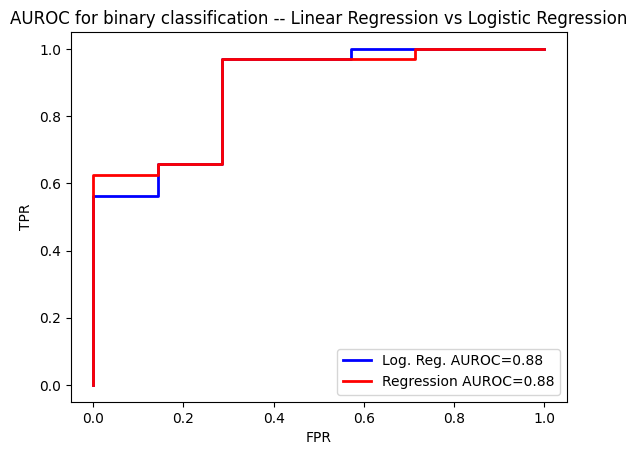

In [241]:
# plot and report AUROC for both linear regression and logistic regression
plt.clf()
plt.title('AUROC for binary classification -- Linear Regression vs Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(lr_fpr, lr_tpr, 'b', lw=2, label=f'Log. Reg. AUROC={lr_auc:.2f}')
plt.plot(linreg_fpr, linreg_tpr, 'r', lw=2, label=f'Regression AUROC={linreg_auc:.2f}')
plt.legend(loc='best')

### 7. Report the test accuracies of multivariate linear regression and multi-class logistic regression on the multi-class classification test data.

In [242]:
best_mlr_learning_rate = best_mlr_model['learning rate']
best_mlr_iters = best_mlr_model['max iterations']
opt_mlr = Multinomial_logistic(nFeatures=wine_nFeatures, nClasses=wine_nClasses)
opt_mlr.fit(X=wine_X_train, y=wine_y_train, lr=best_mlr_learning_rate, niter=int(best_mlr_iters))
mlr_predictions = opt_mlr.predict(X=wine_X_test)
mlr_predict_classes = opt_mlr.predict_multiclass(mlr_predictions)
mlr_test_accuracy = evaluate_test_accuracy(mlr_predict_classes, wine_y_test)
print(f'Multiclass Logistic Regression Test Accuracy is {mlr_test_accuracy:.2f}%')

Streaming output truncated to the last 5000 lines.
iter 5001: 19.984
iter 5002: 19.709
iter 5003: 19.984
iter 5004: 19.709
iter 5005: 19.984
iter 5006: 19.709
iter 5007: 19.984
iter 5008: 19.709
iter 5009: 19.984
iter 5010: 19.709
iter 5011: 19.984
iter 5012: 19.709
iter 5013: 19.984
iter 5014: 19.709
iter 5015: 19.984
iter 5016: 19.709
iter 5017: 19.984
iter 5018: 19.709
iter 5019: 19.984
iter 5020: 19.709
iter 5021: 19.984
iter 5022: 19.709
iter 5023: 19.984
iter 5024: 19.709
iter 5025: 19.984
iter 5026: 19.709
iter 5027: 19.984
iter 5028: 19.709
iter 5029: 19.984
iter 5030: 19.709
iter 5031: 19.984
iter 5032: 19.709
iter 5033: 19.984
iter 5034: 19.709
iter 5035: 19.984
iter 5036: 19.709
iter 5037: 19.984
iter 5038: 19.709
iter 5039: 19.984
iter 5040: 19.709
iter 5041: 19.984
iter 5042: 19.709
iter 5043: 19.984
iter 5044: 19.709
iter 5045: 19.984
iter 5046: 19.709
iter 5047: 19.984
iter 5048: 19.709
iter 5049: 19.984
iter 5050: 19.709
iter 5051: 19.984
iter 5052: 19.709
iter 5053: 19

In [243]:
multlinreg = MultipleLinearRegression()
multlinreg_predictions = multlinreg.fit(X=wine_X_train, y=wine_y_train).predict(x=wine_X_test)

In [244]:
multlinreg_predictions

array([[ 0.06710825,  0.13036873,  0.80252302],
       [ 0.96434443,  0.27071739, -0.23506182],
       [ 0.15075204,  0.98355408, -0.13430612],
       [ 1.0377564 , -0.11749662,  0.07974022],
       [ 0.89478844, -0.0610527 ,  0.16626427],
       [ 0.79073987,  0.06490975,  0.14435038],
       [ 0.02172209,  1.15347187, -0.17519396],
       [ 0.24137314,  0.66697616,  0.09165069],
       [ 0.54797357,  0.57548425, -0.12345782],
       [ 1.35954026, -0.39201847,  0.03247821],
       [ 0.28528583, -0.05820915,  0.77292332],
       [ 0.24680604,  0.62880205,  0.12439191],
       [ 0.78708156,  0.26317124, -0.0502528 ],
       [ 0.66846039,  0.33794132, -0.00640171],
       [ 0.16419193,  0.74556155,  0.09024651],
       [ 0.16428549,  0.64821454,  0.18749997],
       [ 0.94008493,  0.18416966, -0.12425459],
       [ 0.05810565,  0.15810971,  0.78378464],
       [ 0.21009059,  0.75462238,  0.03528703],
       [-0.18054896,  0.99232637,  0.18822259],
       [ 1.06943102, -0.1022277 ,  0.032

In [245]:
linreg_class_probs = softmax(multlinreg_predictions)
linreg_class_probs

array([[0.240868  , 0.25659772, 0.50253428],
       [0.55520601, 0.27746983, 0.16732416],
       [0.2468085 , 0.56759878, 0.18559272],
       [0.58870936, 0.1854304 , 0.22586025],
       [0.53558728, 0.2059272 , 0.25848552],
       [0.49804351, 0.24101455, 0.26094194],
       [0.20315551, 0.63000108, 0.16684341],
       [0.29485826, 0.45128443, 0.25385731],
       [0.39387613, 0.40486236, 0.20126151],
       [0.69504358, 0.12059235, 0.18436408],
       [0.2996029 , 0.21250445, 0.48789265],
       [0.29850852, 0.43737655, 0.26411493],
       [0.49381176, 0.29243548, 0.21375276],
       [0.4488779 , 0.32254151, 0.22858059],
       [0.26901906, 0.48113691, 0.24984403],
       [0.274279  , 0.44500027, 0.28072073],
       [0.551105  , 0.25878823, 0.19010677],
       [0.2397329 , 0.26494691, 0.49532019],
       [0.28062904, 0.48374865, 0.2356223 ],
       [0.17614232, 0.56916343, 0.25469426],
       [0.60078143, 0.18615366, 0.21306491],
       [0.17854299, 0.27265075, 0.54880626],
       [0.

In [246]:
max_indices = np.argmax(linreg_class_probs, axis=1)
one_hot = np.zeros_like(linreg_class_probs, dtype=int)
one_hot[np.arange(linreg_class_probs.shape[0]), max_indices] = 1
one_hot

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [247]:
multlinreg_accuracy = evaluate_test_accuracy(one_hot, wine_y_test)
print(f'Multiple Linear Regression Test Accuracy For Multiclass Classification: {multlinreg_accuracy:.2f}')

Multiple Linear Regression Test Accuracy For Multiclass Classification: 100.00


So the test accuracy of multiclass logistic regression on the wine test dataset is 98.15%, and the test accuracy of multiple linear regression is 100%

### 8. Compare the binary regression coefficients learned by your logistic regression with those simple and/or multiple linear regression coefficients in task 1 and/or task 2, respectively. You may compare the horizontal barplot from the two sets of coefficients side by side. Do the top features change and why?

In [248]:
lin_reg_parkinsons_weights

array([ 4.58238267e-01, -9.91010290e-02,  1.60391019e-01, -1.24217717e-01,
       -1.16734320e-01, -5.25442218e-16])

In [249]:
# drop intercept column
lin_reg_parkinsons_weights = lin_reg_parkinsons_weights[:-1]

In [250]:
lin_reg_parkinsons_weights

array([ 0.45823827, -0.09910103,  0.16039102, -0.12421772, -0.11673432])

In [251]:
log_reg_parkinsons_weights

array([ 1.27156049,  1.09600027,  0.5896752 ,  0.0099889 , -0.07170025,
        2.36741455])

In [252]:
parkinsons_features = [*parkinsons_features]
parkinsons_linreg_weights = {pair[0]:pair[1] for pair in zip(parkinsons_features, lin_reg_parkinsons_weights)}

In [253]:
parkinsons_linreg_weights

{'spread1': 0.45823826720248884,
 'PPE': -0.09910102896934814,
 'spread2': 0.16039101900155753,
 'MDVP:Flo': -0.12421771683540411,
 'MDVP:Fo': -0.11673432016641916}

In [254]:
parkinsons_logreg_weights = {pair[0]:pair[1] for pair in zip(parkinsons_features, log_reg_parkinsons_weights)}

In [255]:
parkinsons_logreg_weights

{'spread1': 1.2715604931105338,
 'PPE': 1.096000273579001,
 'spread2': 0.5896752002808201,
 'MDVP:Flo': 0.009988898800266032,
 'MDVP:Fo': -0.07170025348383294}

#### Now plot the two against each other

In [256]:
# convert both to Series objects
parkinsons_linreg_weights_series = pd.Series(parkinsons_linreg_weights)
parkinsons_logreg_weights_series = pd.Series(parkinsons_logreg_weights)

In [257]:
# now sort them according to weight
parkinsons_linreg_weights_series = parkinsons_linreg_weights_series.sort_values(ascending=False)
parkinsons_logreg_weights_series = parkinsons_logreg_weights_series.sort_values(ascending=False)

Text(0.5, 1.0, 'Linear Regression Coefficients -- Binary Classification Task')

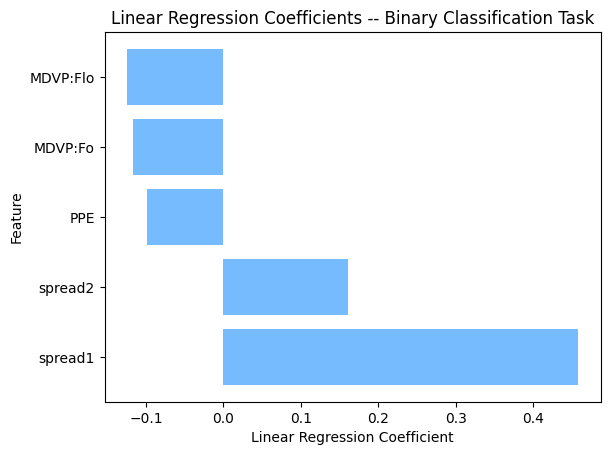

In [258]:
plt.clf()
plt.barh(parkinsons_linreg_weights_series.index, parkinsons_linreg_weights_series, color='xkcd:sky blue')
plt.xlabel('Linear Regression Coefficient')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients -- Binary Classification Task')

Text(0.5, 1.0, 'Logsitic Regression Coefficients -- Binary Classification Task')

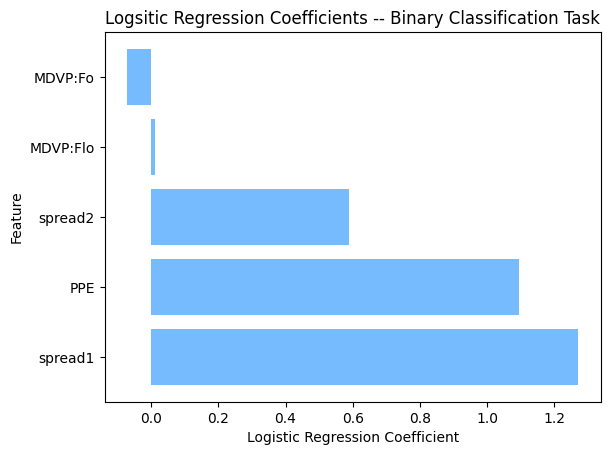

In [259]:
plt.clf()
plt.barh(parkinsons_logreg_weights_series.index, parkinsons_logreg_weights_series, color='xkcd:sky blue')
plt.xlabel('Logistic Regression Coefficient')
plt.ylabel('Feature')
plt.title('Logsitic Regression Coefficients -- Binary Classification Task')

Here we can see for the most part that the importance of the features has not changed; aside from only one swap having occurred between linear regression and logistic regression, the rest of the features have stayed the same in terms of importance. We can speculate that the features have remained relatively the same because of the nature of logistic regression -- by using gradient descent, the model is allowed to gradually close in on a closed-form solution (linear regression), where it stops shy due to the stopping criterion (norm/max iterations). As for what could have caused the swap, this could also be caused by the stopping criterion -- perhaps the model was stopped before it arrived to the linear regression solution.

### 9. Heatmap comparison

<Axes: >

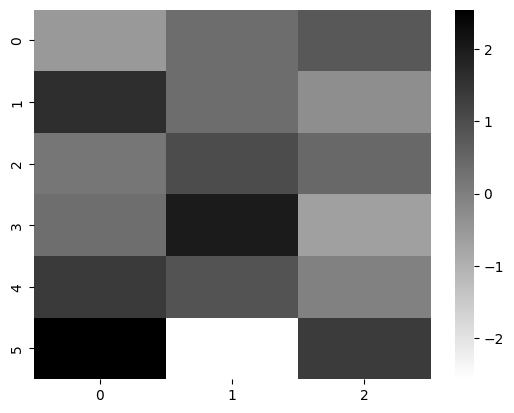

In [260]:
sns.heatmap(data=multiclass_wine_weights, cmap='gray_r')

<Axes: >

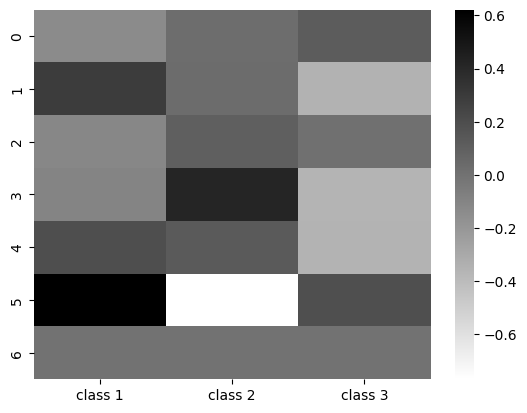

In [261]:
sns.heatmap(data=lin_reg_wine_weights, cmap='gray_r')

Ignoring the last row (row 6) of the multiple linear regression heatmap (which is due to us initializing the classifier with `add_bias=True` -- this can be confirmed with the weights being virtually all the same for all of the classes), we can see that the weights (and thus the features the model deems important) is very similar between the two classifiers. As to why this might be, again, we can speculate that this is because logistic regression is allowed to converge (through gradient descent) to a very similar solution relative to multiple linear regression, which directly computes the weights that minimize the squared error loss via a known, closed-form solution.